In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, accuracy_score
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import random

%matplotlib inline

# Make results reproducible
random.seed(100)

In [0]:
import pandas as pd


class Dataloader(): 
    def __init__(self, csv_path):
      #  Initialize Bike Sharing Dataset dataloader.  
        self.csv_path = csv_path
        self.data = pd.read_csv(self.csv_path)
        # Shuffle
        #self.data.sample(frac=1.0, replace=True, random_state=30)
      #init cannot return value so getFullData() function is written
    def getFullData(self):
        return self.data
    def getData(self):
        # Split data into train and validation(test) set with 70:30 ratio
        split_train = int(0.8 * len(self.data)) 
        train = self.data[:split_train]
        val = self.data[split_train:]
        return train, val

## Descriptive Analysis

split dataset into training, validation, and testing:

In [0]:
dataloader = Dataloader('/content/drive/My Drive/AI ML/Project_2/Project_2/Dataset/hour.csv')

fullData = dataloader.getFullData()
train, val = dataloader.getData()
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']

Get column names

In [0]:
list(fullData.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

first 5 rows of the dataset

In [0]:
fullData.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


data statistics



In [0]:
fullData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [0]:
for col in category_features:
    fullData[col] = fullData[col].astype('category')
fullData[category_features].describe()

,season,holiday,mnth,hr,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17379,17379
unique,4,2,12,24,7,2,4
top,3,0,7,17,6,1,1
freq,4496,16879,1488,730,2512,11865,11413


## Missing Value Analysis

Check any NULL values in data:

In [0]:
print(fullData.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


## Outlier Analysis

### Box plots

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

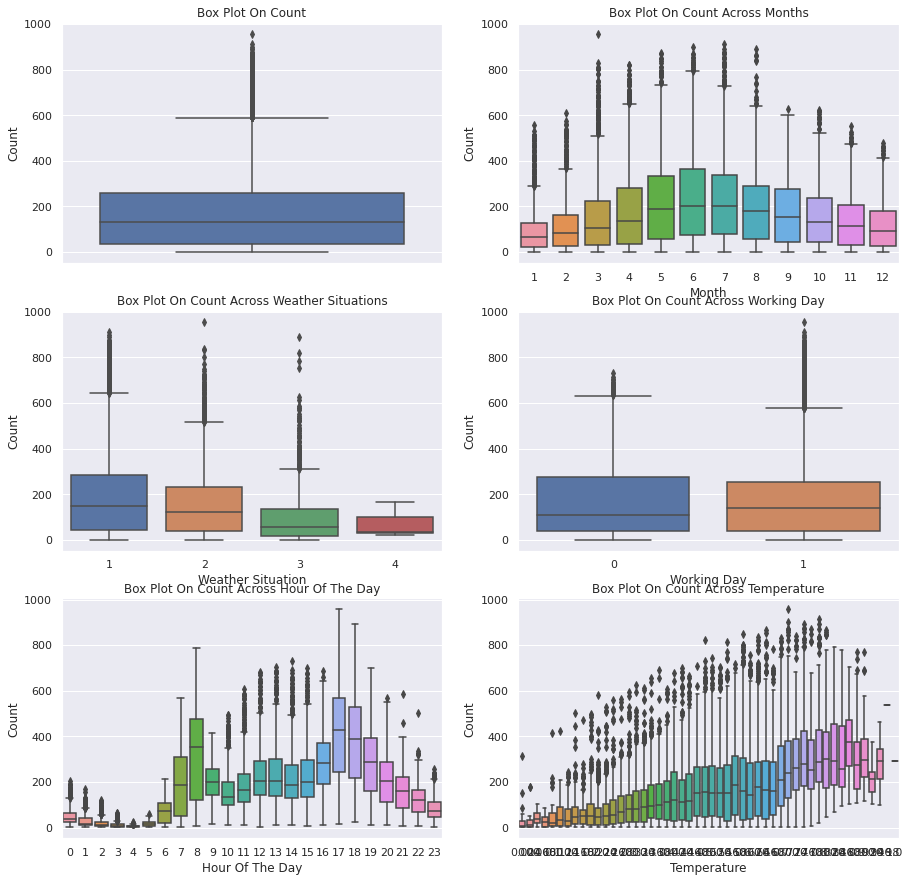

In [0]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=train,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")


__Interpretation:__ The working day and holiday box plot indicates that more bicycles are rent during normal working days than on weekends or holidays. The hourly box plots show a local maximum at 8 am and one at 5 pm followed by 6 pm which indicates that most users of the bicycle rental service use the bikes to get to work or school. Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data.

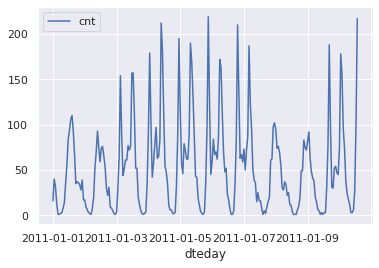

In [0]:
train[:24*10].plot(x='dteday', y='cnt')

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

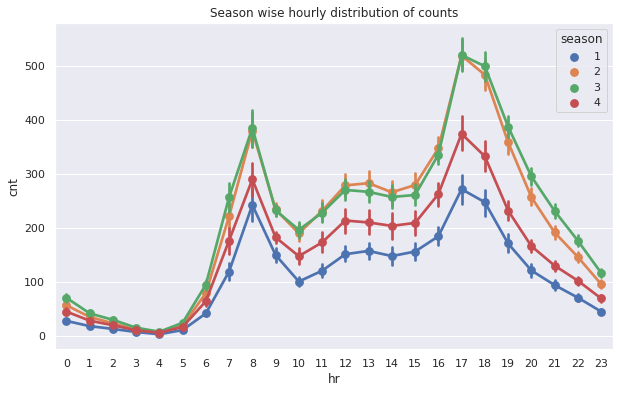

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.pointplot(data=train[['hr', 'cnt', 'season']],
             x='hr',y='cnt',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

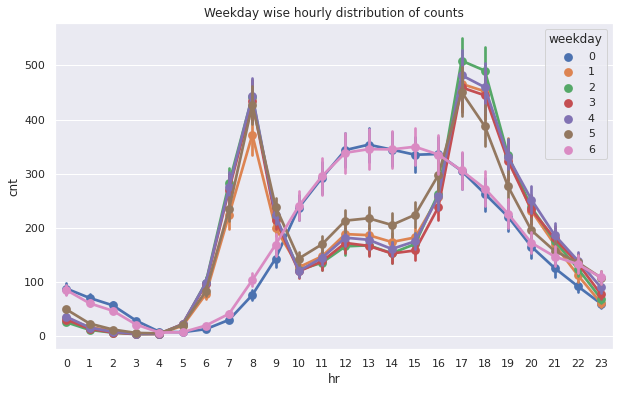

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.pointplot(data=train[['hr', 'cnt', 'weekday']],
             x='hr',y='cnt',
             hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Monthly distribution of counts')]

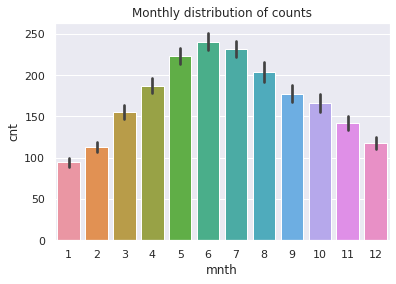

In [0]:
fig,ax = plt.subplots()
sns.barplot(data=train[['mnth',
                         'cnt']],
            x="mnth",y="cnt")
ax.set(title="Monthly distribution of counts")

**Interpretation**: June sees the highest bike users.

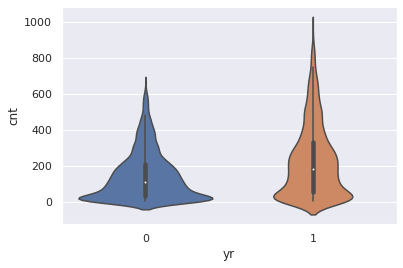

In [0]:
sns.violinplot(data=train[['yr','cnt']],
              x="yr",y="cnt")

### Remove outliers from data

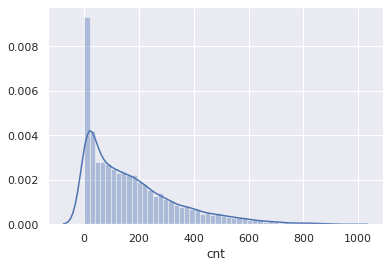

In [0]:
sns.distplot(train[target[-1]]);

The distribution plot of the count values reveals that the count values do not match a normal distribution. We will use the median and interquartile range (IQR) to identify and remove outliers from the data.
source:
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

Samples in train set with outliers: 13903
Samples in train set without outliers: 13507


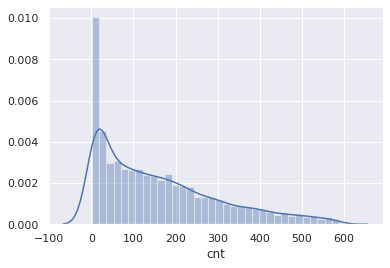

In [0]:
print("Samples in train set with outliers: {}".format(len(train)))
q1 = train.cnt.quantile(0.25)
q3 = train.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
train_preprocessed = train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
sns.distplot(train_preprocessed.cnt);

## Correlation Analysis

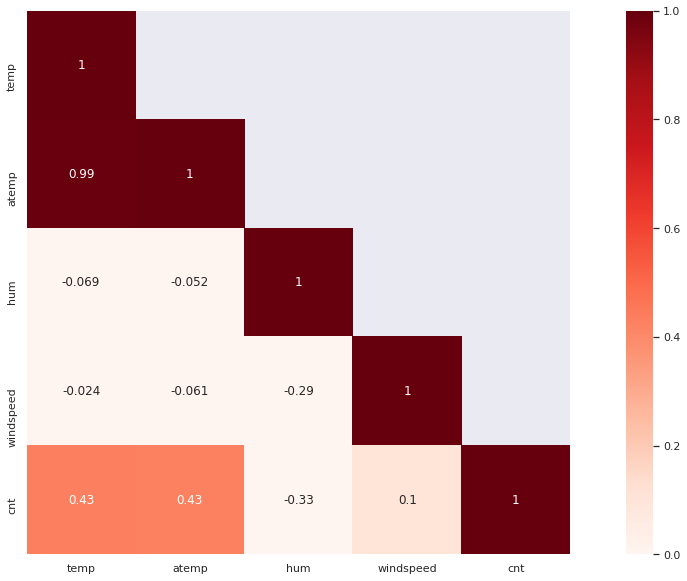

In [0]:
matrix = train[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

In [0]:
features.remove('atemp')

## Overview Metrics

### Mean Squared Error (MSE)

MSE = $\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - y_i)^2}$

### Root Mean Squared Logarithmic Error (RMSLE)

RMSLE = $\sqrt{ \frac{1}{N} \sum_{i=1}^N (\log(x_i) - \log(y_i))^2 }$

### $R^2$ Score

$R^2=1-\frac{\sum_{i=1}^{n}e_i^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$

## Model Selection

In [0]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()
# Sort validation set for plots
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
#x_test = test[features].values

table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "Score"]

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, n_estimators=300),
    AdaBoostRegressor(DecisionTreeRegressor(max_depth=40),
                          n_estimators=50, random_state=0)
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_val)

    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+--------------------+-------+
|         Model         | Mean Squared Error | Score |
+-----------------------+--------------------+-------+
|      SGDRegressor     |      35107.68      |  0.28 |
|         Lasso         |      42248.48      |  0.13 |
|       ElasticNet      |      45205.25      |  0.07 |
|         Ridge         |      42223.36      |  0.13 |
|          SVR          |      48069.17      |  0.01 |
|          SVR          |      38331.40      |  0.21 |
|    BaggingRegressor   |      16266.14      |  0.67 |
|    BaggingRegressor   |      36209.94      |  0.26 |
|         NuSVR         |      37567.21      |  0.23 |
| RandomForestRegressor |      15917.62      |  0.67 |
|   AdaBoostRegressor   |      16188.35      |  0.67 |
+-----------------------+--------------------+-------+


## Random Forest

### Random Forest Model

In [0]:
# Table setup

table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "Score"]
# Model training
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y) 
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)

+-----------------------+------------+----------+-------+-------+-------+
|         Model         |  Dataset   |   MSE    |  MAE  | RMSLE | Score |
+-----------------------+------------+----------+-------+-------+-------+
| RandomForestRegressor |  training  |  681.53  | 16.10 |  0.23 |  0.97 |
| RandomForestRegressor | validation | 16275.06 | 88.00 |  0.49 |  0.67 |
+-----------------------+------------+----------+-------+-------+-------+


In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0)
# Fit the random search model
model.fit(x_train, y_train)
print(model)

# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "Score"]

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)


{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6, 9, 11, 14, 17, 19, 22, 24, 27, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, bootstrap=True, total=   0.3s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, bootstrap=True, total=   0.2s
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, bootstrap=True 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, bootstrap=True, total=   0.2s
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=24, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=24, bootstrap=True, total=   1.6s
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=24, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=24, bootstrap=True, total=   1.5s
[CV] n_estimators=115, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=24, bootstrap=True 
[CV]  n_estimators=115, min_samples_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  9.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

### Feature importance

In [0]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [0]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

In [0]:
# Plot the feature importances of the forest
plt.figure(figsize=(14,5))
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()

__Interpretation:__ The result corresponds to the high correlation of the hour and temperature variable with the bicycle sharing count in the feature correlation matrix.